In [21]:
from bincatsim.simulator import GaiaSimulator
from bincatsim.instruments import CCD
from bincatsim.core.root import PSF_DATA_PATH
import numpy as np
import os

ccd = CCD(os.path.join(PSF_DATA_PATH, '1062x2124_gpsf.fits'))
sim = GaiaSimulator(ccd=ccd, M1=5, M2=5, distance=200, angle=45)


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 5080 Laptop GPU`
       Memory = 16220.22 MB | Compute Capability = 12.0
       Using CuPy 13.6.0 for acceleration.


/home/pietrof/miniforge3/envs/bincat/lib/python3.13/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [51]:
def calc_photons(**args):
    # M: magnitude
    # collecting_area: in m^2
    # integration_time: in seconds
    return sim._compute_star_flux(**args)

TDIgates = np.asarray([4494, 2906, 2057, 1030, 512, 256, 128, 64, 32, 16, 8, 4, 2])
TDIlines = 4494 # light sensitive
TDI_clock_rate = 0.9828e-3 # seconds per TDI line

integration_times = TDIgates * TDI_clock_rate

tmax = integration_times[0]

gates = {  # no gate
    1: integration_times[12],
    2: integration_times[11],
    3: integration_times[10],
    4: integration_times[9],
    5: integration_times[8],
    6: integration_times[7],
    7: integration_times[6],
    8: integration_times[5],
    9: integration_times[4],
    10: integration_times[3],
    11: integration_times[2],
    12: integration_times[1],
    00: tmax  # no gate
}

full_well_capacity = 240000  # e-

for gate, t in gates.items():
    M=0
    max_photons = calc_photons(M=M, collecting_area=(4494*10*1e-6 * 1966*30*1e-6), integration_time=t)
    photoelectrons = max_photons * 0.8 * 2 # QE ~ 1, gain ~ 2
    saturation_mag = (-2.5 * np.log10(full_well_capacity / photoelectrons))[0]
    print(f"Gate {gate:2d}: Integration time = {t*1e3:7.3f} ms, Photoelectrons produced at M={M} = {photoelectrons[0]:10.1f} e-, Saturation magnitude = {saturation_mag:5.2f}")

Gate  1: Integration time =   1.966 ms, Photoelectrons produced at M=0 =   498433.4 e-, Saturation magnitude =  0.79
Gate  2: Integration time =   3.931 ms, Photoelectrons produced at M=0 =   996866.9 e-, Saturation magnitude =  1.55
Gate  3: Integration time =   7.862 ms, Photoelectrons produced at M=0 =  1993733.8 e-, Saturation magnitude =  2.30
Gate  4: Integration time =  15.725 ms, Photoelectrons produced at M=0 =  3987467.5 e-, Saturation magnitude =  3.05
Gate  5: Integration time =  31.450 ms, Photoelectrons produced at M=0 =  7974935.0 e-, Saturation magnitude =  3.80
Gate  6: Integration time =  62.899 ms, Photoelectrons produced at M=0 = 15949870.0 e-, Saturation magnitude =  4.56
Gate  7: Integration time = 125.798 ms, Photoelectrons produced at M=0 = 31899740.0 e-, Saturation magnitude =  5.31
Gate  8: Integration time = 251.597 ms, Photoelectrons produced at M=0 = 63799480.0 e-, Saturation magnitude =  6.06
Gate  9: Integration time = 503.194 ms, Photoelectrons produced 

In [ ]:
photon_curve = []
m_vec = np.linspace(0, 21, 400)
for M in m_vec:
    t = 
    photon_curve.append(calc_photons(M=M, collecting_area=1.45*0.5, integration_time=t))

photon_curve = np.array(photon_curve)[:,0]

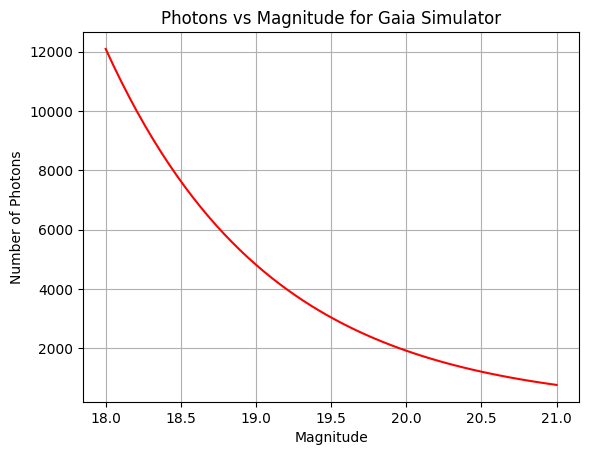

In [28]:
import matplotlib.pyplot as plt

#plt.plot(m_vec, photon_curve)
plt.plot(m_vec[np.where(m_vec>=18)], photon_curve[np.where(m_vec>=18)], c='red')
plt.xlabel('Magnitude')
plt.ylabel('Number of Photons')
plt.title('Photons vs Magnitude for Gaia Simulator')
plt.grid(True)
plt.show()